# Logistic Regression Analysis

#### Logistic Regression is a generalization of linear regression that predicts a categorical outcome variable by computing the log odds of the outcome as a linear function of the input variables.-- Camm Business Analytics 4e Chapter 9.

#### In this analysis, we will use a dataset from Kaggle.com. This dataset collected the data regarding the situation of  small business getting approval or not from the banks.
##### First of all, we need to import the dataset and libraries needed.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
### Import raw Data to the database.

In [144]:
raw=pd.read_csv("D:/Business Analytics/Second Term/Data Acquization 8125/Final Group Project/archive/SBAnational.csv")
raw

C:\Users\barry\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


#### From the dataset above, we can get that the dataset has 899164 rows and 27 column which it is a big dataset.

#### After importing the dataset, the following step would be data cleaning, such as delting the nulls, duplicates, etc.

#### There are two more documents which can help us to understand this dataset better. One is the explanations for title for each column, the other one is the explanation of the number in column 'NAICS'. Here we can import these two documents as well.

In [147]:
title = pd.read_csv("D:/Business Analytics/Second Term/Data Acquization 8125/Final Group Project/archive/t0001-10.1080_10691898.2018.1434342.csv")
title

,Variable name,Data type,Description of variable
0,LoanNr_ChkDgt,Text,Identifier- Primary key
1,Name,Text,Borrower name
2,City,Text,Borrower city
3,State,Text,Borrower state
4,Zip,Text,Borrower zip code
5,Bank,Text,Bank name
6,BankState,Text,Bank state
7,NAICS,Text,North American industry classification system ...
8,ApprovalDate,Date/Time,Date SBA commitment issued
9,ApprovalFY,Text,Fiscal year of commitment


In [148]:
naics_exp = pd.read_csv("D:/Business Analytics/Second Term/Data Acquization 8125/Final Group Project/archive/NAICS.csv")
naics_exp

,Sector,Description
0,11,"Agriculture, forestry, fishing and hunting"
1,21,"Mining, quarrying, and oil and gas extraction"
2,22,Utilities
3,23,Construction
4,31-33,Manufacturing
5,42,Wholesale trade
6,44-45,Retail trade
7,48-49,Transportation and warehousing
8,51,Information
9,52,Finance and insurance


## 1. Data Cleaning

#### 1) Check if there are unusal spaces in the column titles:

In [145]:
raw.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

#### Fortunately, titles for all columns are good.
#### 2) Check if there is missing data in each column of the dataset:

In [146]:
raw.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

#### From the result above, we found there are quite some missing data in columns 'Bank', 'BankState', 'NewExist', 'RevlinCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate', and 'MIS_Status'. As the explanation of the title document above, the 'ChgOffDate'could be empty if the loan was not approved defaultly, so we can ignore the missing data in column 'ChgOffDate'.

#### Since there are more than 800K data in this dataset, and the missing data in those columns is just few thousand each, so we choose to delete all missing data rows directly except 'ChgOffDate' column.

In [9]:
### delete all rows which have nulls except column 'ChgOffDate'
raw1=raw.dropna(how='any', subset=['Name','City','State','NewExist','DisbursementDate','Bank','BankState','RevLineCr','LowDoc','MIS_Status'])

In [149]:
raw1.isnull().sum()

LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           725369
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

<p>After deleting those rows, we now check the dataset size again. </p>

In [150]:
raw1.shape

(886240, 27)

#### 3) After checking, there are some 0 values in column 'NACIS'. This column means the industries, so 0 values will affect the analysis. Same as the nulls, we will delete those rows as well.

In [13]:
### delete all rows have 0 in column 'NAICS'
cleandata=raw1[raw1.NAICS!=0]

In [151]:
cleandata.shape

(687973, 27)

#### 4) Check if any duplicated rows in the cleandata.

In [153]:
cleandata.duplicated().sum()

0

#### 5) Regarding the document naics, the first two digits present the industry. In order to analyze the industry, we will extract the first two digits in the column 'NAICS'. 

In [156]:
## Get the first two digits of column 'NAICS'

import math
def first_two(d):                
     return (d // 10 ** (int(math.log(d, 10)) - 1))

cleandata['NAICS']=cleandata.NAICS.apply(first_two)

C:\Users\barry\AppData\Local\Temp/ipykernel_14476/4219898512.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandata['NAICS']=cleandata.NAICS.apply(first_two)


#### 6) Regarding the logistics regression, the output is categorical data which is 0 or 1. We will use the column 'MIS_Status' as the output. In order to do the analysis, we will convert 'PIG' to 0 which means the loan was not approved defaultly, and the 'CHGOFF' wwill be 1 which means the loan was approved defaultly.

In [159]:
cleandata['MIS_Status'][cleandata['MIS_Status']=='P I F'] = 0
cleandata['MIS_Status'][cleandata['MIS_Status']=='CHGOFF'] = 1

C:\Users\barry\AppData\Local\Temp/ipykernel_14476/1205724039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandata['MIS_Status'][cleandata['MIS_Status']=='P I F'] = 0
C:\Users\barry\anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\barry\AppData\Local\Temp/ipykernel_14476/1205724039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

### Here is the clean data.

In [160]:
cleandata

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,45,1997-02-28,1997,...,N,Y,NaN,1999-02-28,"$60,000.00",$0.00,0,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,72,1997-02-28,1997,...,N,Y,NaN,1997-05-31,"$40,000.00",$0.00,0,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,62,1997-02-28,1997,...,N,N,NaN,1997-12-31,"$287,000.00",$0.00,0,$0.00,"$287,000.00","$215,250.00"
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,33,1997-02-28,1997,...,N,N,NaN,1997-06-30,"$517,000.00",$0.00,0,$0.00,"$517,000.00","$387,750.00"
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,81,1997-02-28,1997,...,N,Y,NaN,1998-06-30,"$45,000.00",$0.00,0,$0.00,"$45,000.00","$36,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899156,9995473009,"FABRICATORS STEEL, INC.",BALTIMORE,MD,21224,BANK OF AMERICA NATL ASSOC,MD,33,1997-02-27,1997,...,0,N,NaN,1997-06-30,"$50,000.00",$0.00,0,$0.00,"$50,000.00","$25,000.00"
899157,9995493004,PULLTARPS MFG.,EL CAJON,CA,92020,U.S. BANK NATIONAL ASSOCIATION,CA,31,1997-02-27,1997,...,N,N,NaN,1997-03-31,"$200,000.00",$0.00,0,$0.00,"$200,000.00","$150,000.00"
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,45,1997-02-27,1997,...,0,N,NaN,1997-09-30,"$70,000.00",$0.00,0,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,45,1997-02-27,1997,...,Y,N,NaN,1997-10-31,"$85,000.00",$0.00,0,$0.00,"$85,000.00","$42,500.00"


## 2. Data Analysis

#### There are 27 columns int he dataset, but not all of them will be used for the analysis. We need to find which columns could be uesd as the variables. As mentioned above, we will use 'MIS_Status' as the output, so we can check if other columns are related with column 'MIS_Status. We can use visulization to make the results more easier to be understood. 

#### Obviously, we don't need to do any analysis for columns 'LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank','ApprovalDate', 'Term', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'. Thouse data could not be used in this analysis.

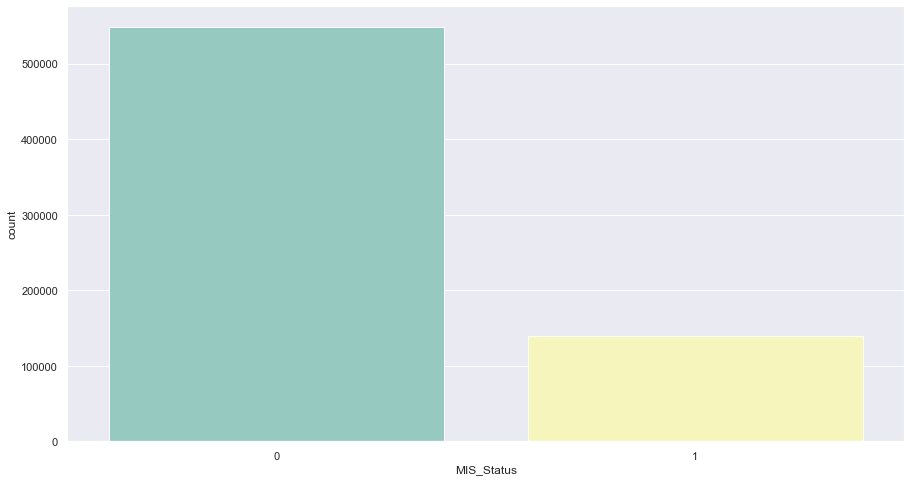

In [161]:
# check the numbers for default and non-default
sns.countplot(x = 'MIS_Status', data = cleandata, palette = 'Set3')
sns.set(rc={'figure.figsize':(11.7,8.27)})

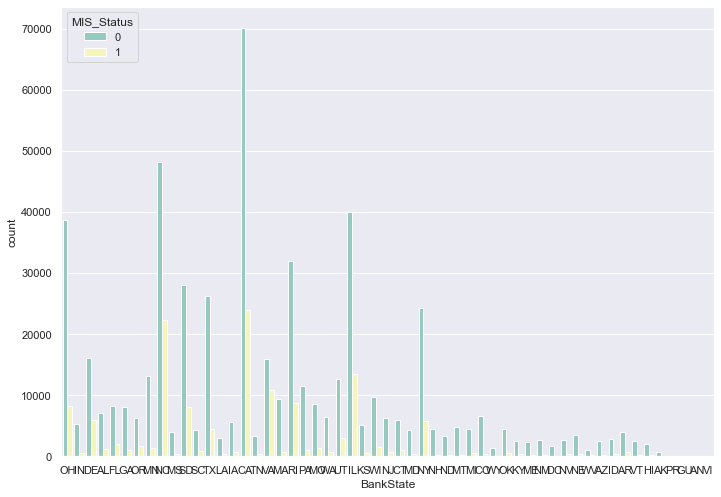

In [162]:
## check columns for default and non-defaults

sns.countplot(x = 'BankState', data = cleandata, palette = 'Set3', hue = 'MIS_Status')
sns.set(rc={'figure.figsize':(11.7,8.27)})

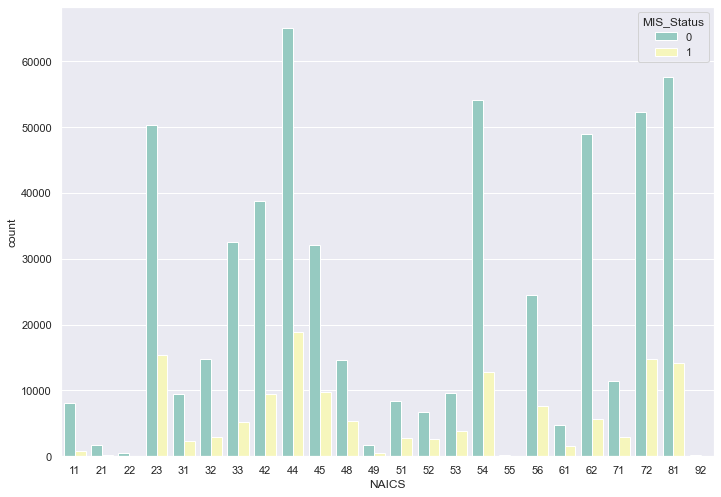

In [163]:
sns.countplot(x = 'NAICS', data = cleandata, palette = 'Set3', hue = 'MIS_Status')
sns.set(rc={'figure.figsize':(11.7,8.27)})

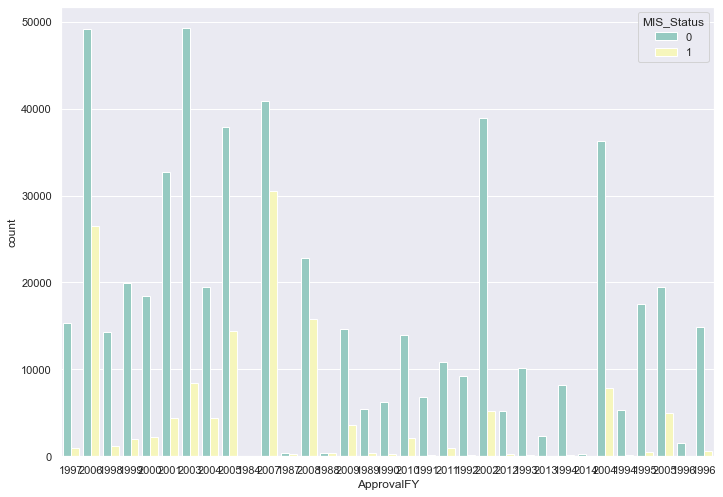

In [164]:
sns.countplot(x = 'ApprovalFY', data = cleandata, palette = 'Set3', hue = 'MIS_Status')
sns.set(rc={'figure.figsize':(11.7,8.27)})

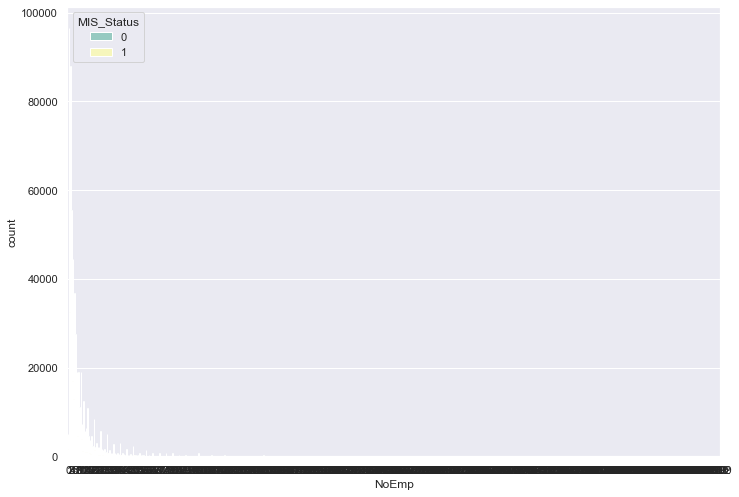

In [166]:
sns.countplot(x = 'NoEmp', data = cleandata, palette = 'Set3', hue = 'MIS_Status')
sns.set(rc={'figure.figsize':(11.7,8.27)})

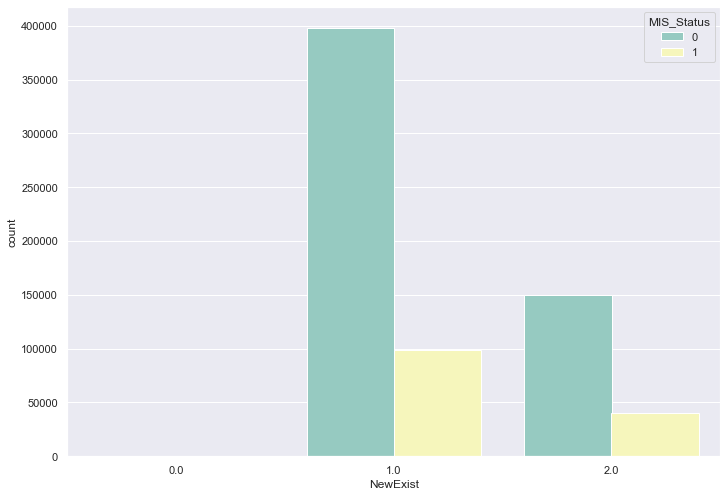

In [167]:
sns.countplot(x = 'NewExist', data = cleandata, palette = 'Set3', hue = 'MIS_Status')
sns.set(rc={'figure.figsize':(11.7,8.27)})

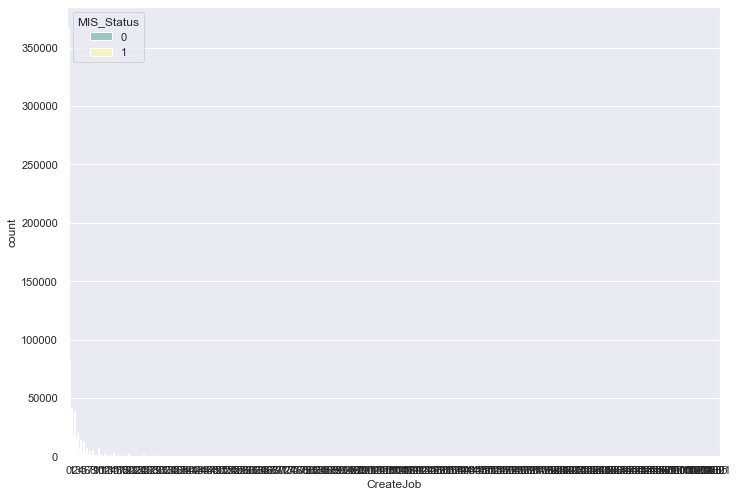

In [168]:
sns.countplot(x = 'CreateJob', data = cleandata, palette = 'Set3', hue = 'MIS_Status')
sns.set(rc={'figure.figsize':(11.7,8.27)})

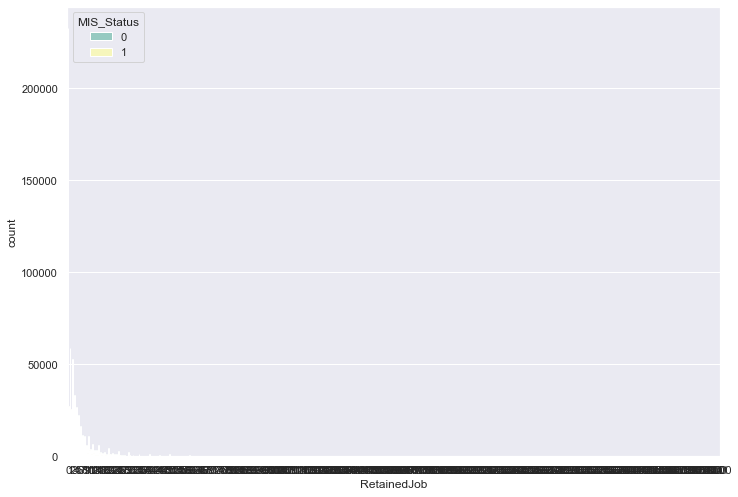

In [169]:
sns.countplot(x = 'RetainedJob', data = cleandata, palette = 'Set3', hue = 'MIS_Status')
sns.set(rc={'figure.figsize':(11.7,8.27)})

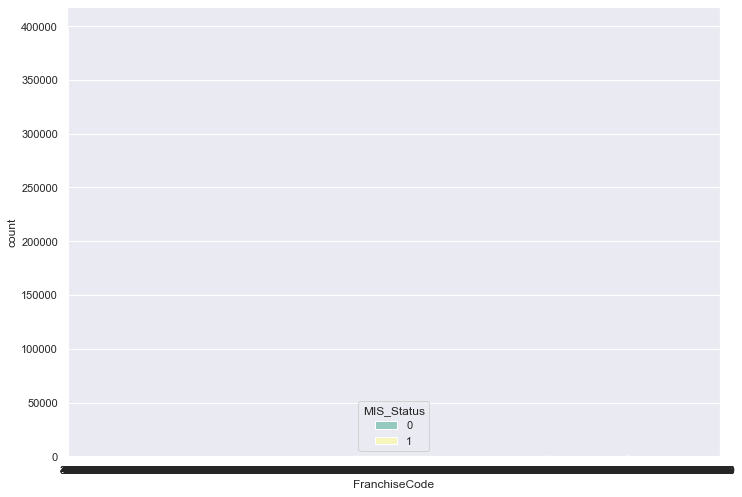

In [171]:
sns.countplot(x = 'FranchiseCode', data = cleandata, palette = 'Set3', hue = 'MIS_Status')
sns.set(rc={'figure.figsize':(11.7,8.27)})

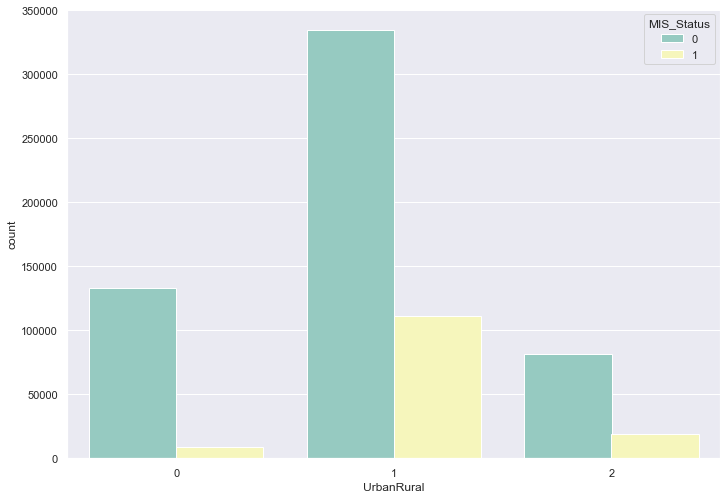

In [172]:
sns.countplot(x = 'UrbanRural', data = cleandata, palette = 'Set3', hue = 'MIS_Status')
sns.set(rc={'figure.figsize':(11.7,8.27)})

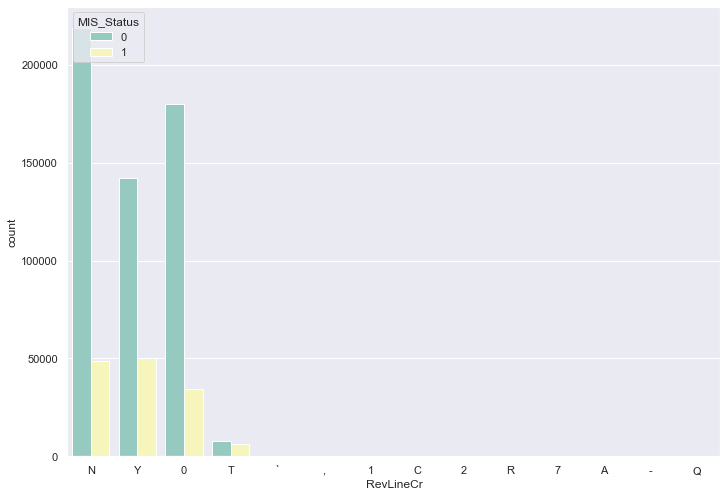

In [173]:
sns.countplot(x = 'RevLineCr', data = cleandata, palette = 'Set3', hue = 'MIS_Status')
sns.set(rc={'figure.figsize':(11.7,8.27)})

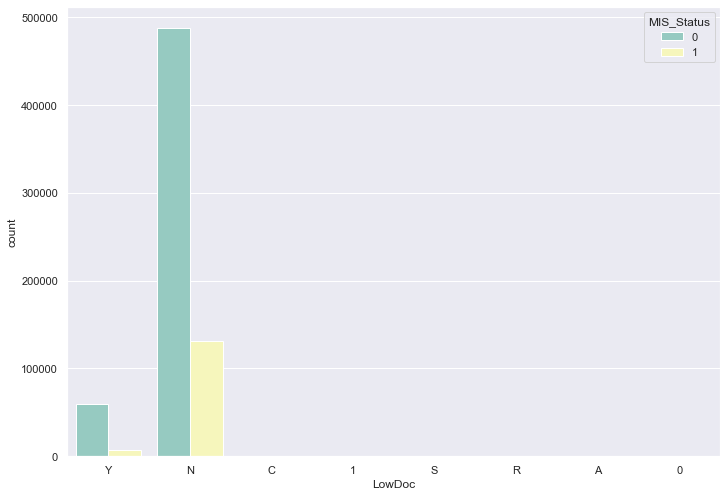

In [174]:
sns.countplot(x = 'LowDoc', data = cleandata, palette = 'Set3', hue = 'MIS_Status')
sns.set(rc={'figure.figsize':(11.7,8.27)})

#### By all plots above, we can find that columns, 'NoEmp', 'CreateJob', 'RetainedJob', 'FranchiseCode', are not related with 'MIS_Status', so we don't need to use those data as variables. At the same time, we can find that in columns, 'NewExist','RevLineCr', 'LowDoc', not all attributes are working with 'MIS_Status', so we can use those attributes which have connections with 'MIS_Status' for the analysis.

#### In logistic regression analysis, it can only analyze numbers, so we need to covert all categorical data to numbers. Here we will convert all columns which have connections with 'MIS_Status' checked above one by one. As mentioned above, for some varaibles, we don't need all their attributes. That's why we do the convertion one by one.

In [184]:
### Making categorical variables into numberic representation

bankstate=pd.get_dummies(cleandata['BankState'])
bankstate = bankstate.add_prefix('BankState_')
bankstate

,BankState_AK,BankState_AL,BankState_AN,BankState_AR,BankState_AZ,BankState_CA,BankState_CO,BankState_CT,BankState_DC,BankState_DE,...,BankState_TN,BankState_TX,BankState_UT,BankState_VA,BankState_VI,BankState_VT,BankState_WA,BankState_WI,BankState_WV,BankState_WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
899157,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
899159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
899160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
lowdoc=pd.get_dummies(cleandata['LowDoc'])
lowdoc=lowdoc[['N','Y']]
lowdoc.columns = ['LowDoc_N','LowDoc_Y']
lowdoc

,LowDoc_N,LowDoc_Y
0,0,1
1,0,1
2,1,0
5,1,0
7,0,1
...,...,...
899156,1,0
899157,1,0
899159,1,0
899160,1,0


In [185]:
revlinecr=pd.get_dummies(cleandata['RevLineCr'])
revlinecr=revlinecr[['0','N','Y','T']]
revlinecr.columns =['RevLineCr_0','RevLineCr_N','RevLineCr_0RevLineCr_Y','RevLineCr_T']
revlinecr

,RevLineCr_0,RevLineCr_N,RevLineCr_0RevLineCr_Y,RevLineCr_T
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
5,0,1,0,0
7,0,1,0,0
...,...,...,...,...
899156,1,0,0,0
899157,0,1,0,0
899159,1,0,0,0
899160,0,0,1,0


In [186]:
naics=pd.get_dummies(cleandata['NAICS'])
naics = naics.add_prefix('NAICS_')
naics

,NAICS_11,NAICS_21,NAICS_22,NAICS_23,NAICS_31,NAICS_32,NAICS_33,NAICS_42,NAICS_44,NAICS_45,...,NAICS_53,NAICS_54,NAICS_55,NAICS_56,NAICS_61,NAICS_62,NAICS_71,NAICS_72,NAICS_81,NAICS_92
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899156,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
899157,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
899159,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
899160,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [187]:
approvalfy=pd.get_dummies(cleandata['ApprovalFY'])
approvalfy= approvalfy.add_prefix('ApprovalFY_')
approvalfy

,ApprovalFY_1984,ApprovalFY_1987,ApprovalFY_1988,ApprovalFY_1989,ApprovalFY_1990,ApprovalFY_1991,ApprovalFY_1992,ApprovalFY_1993,ApprovalFY_1994,ApprovalFY_1996,...,ApprovalFY_2010,ApprovalFY_2011,ApprovalFY_2012,ApprovalFY_2013,ApprovalFY_2014,ApprovalFY_1994,ApprovalFY_1995,ApprovalFY_1996,ApprovalFY_2004,ApprovalFY_2005
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
899157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
899159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
899160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
newexist = pd.get_dummies(cleandata['NewExist'])
newexist = newexist.add_prefix('NewExist_')
newexist.drop(['NewExist_0.0'], axis=1, inplace = True)
newexist

,NewExist_1.0,NewExist_2.0
0,0,1
1,0,1
2,1,0
5,1,0
7,0,1
...,...,...
899156,1,0
899157,1,0
899159,1,0
899160,1,0


In [190]:
urbanrural = pd.get_dummies(cleandata['UrbanRural'])
urbanrural = urbanrural.add_prefix('UrbanRural_')
urbanrural
                                      

,UrbanRural_0,UrbanRural_1,UrbanRural_2
0,1,0,0
1,1,0,0
2,1,0,0
5,1,0,0
7,1,0,0
...,...,...,...
899156,1,0,0
899157,1,0,0
899159,1,0,0
899160,1,0,0


#### After getting all dummy data, the next step is to combine all data together to be a new dataset which will be used for the logistic analysis.

In [90]:
newdata=cleandata[['MIS_Status']]
newdata = pd.concat([newdata,bankstate, naics, approvalfy, newexist, urbanrural, revlinecr, lowdoc], axis=1)
newdata

,MIS_Status,BankState_AK,BankState_AL,BankState_AN,BankState_AR,BankState_AZ,BankState_CA,BankState_CO,BankState_CT,BankState_DC,...,NewExist_2.0,UrbanRural_0,UrbanRural_1,UrbanRural_2,RevLineCr_0,RevLineCr_N,RevLineCr_0RevLineCr_Y,RevLineCr_T,LowDoc_N,LowDoc_Y
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
7,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899156,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
899157,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
899159,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
899160,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [91]:

newdata.shape

(687973, 124)

In [92]:
newdata.columns

Index(['MIS_Status', 'BankState_AK', 'BankState_AL', 'BankState_AN',
       'BankState_AR', 'BankState_AZ', 'BankState_CA', 'BankState_CO',
       'BankState_CT', 'BankState_DC',
       ...
       'NewExist_2.0', 'UrbanRural_0', 'UrbanRural_1', 'UrbanRural_2',
       'RevLineCr_0', 'RevLineCr_N', 'RevLineCr_0RevLineCr_Y', 'RevLineCr_T',
       'LowDoc_N', 'LowDoc_Y'],
      dtype='object', length=124)

## 3. Features Selection

#### As showed above, there are totally 123 variables for this analysis. We will use Sklearn library to do this logistic regression analysis. So firstly, we need to set the data to X and y. y is the outputing which it should be data of column 'MIS_Status', and X would be all other data.

In [191]:
### Split the data into x, y

X= newdata.drop('MIS_Status', axis=1).values
y= newdata['MIS_Status']

y=y.astype(int)

X.shape


(687973, 123)

In [192]:
y.shape

(687973,)

#### For so many variables, we could use DecisionTreeClssifier to determine the sequence of the importance for alll variables.

In [193]:


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

newdata1 = DecisionTreeClassifier(random_state=20, criterion = 'entropy', max_depth = 15)
newdata1.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=20)

In [195]:
# Running Feature Importance

fi_col = []
fi = []

for i,column in enumerate(newdata.drop('MIS_Status', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, newdata1.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(newdata1.feature_importances_[i])

The feature importance for BankState_AK is : 7.060567225086586e-05
The feature importance for BankState_AL is : 0.00042186249406990045
The feature importance for BankState_AN is : 0.0
The feature importance for BankState_AR is : 0.0003651462290786531
The feature importance for BankState_AZ is : 8.341555734343483e-05
The feature importance for BankState_CA is : 0.04527979554222031
The feature importance for BankState_CO is : 0.0007012633748012902
The feature importance for BankState_CT is : 0.00239359258635706
The feature importance for BankState_DC is : 0.0001016179982314266
The feature importance for BankState_DE is : 0.005516659587497021
The feature importance for BankState_FL is : 0.005996486330099617
The feature importance for BankState_GA is : 0.0006102633933096755
The feature importance for BankState_GU is : 0.0
The feature importance for BankState_HI is : 0.00011609292987412903
The feature importance for BankState_IA is : 0.00019538729844296283
The feature importance for BankSta

#### To make the importance clear, we can convert the result to a data table as below. At the same time, we delete those variables which have 0 values.

In [97]:
# Creating a Dataframe
fi_col
fi

fi_dt = zip(fi_col, fi)
fi_dt = pd.DataFrame(fi_dt, columns = ['Feature','Feature Importance'])
fi_dt


# Ordering the data
fi_dt = fi_dt.sort_values('Feature Importance', ascending = False).reset_index()

## Keep data which 'feature importance' >0


fi_dt=fi_dt.loc[fi_dt['Feature Importance']>0, :]
columns_be_kept=fi_dt['Feature']
fi_dt

,index,Feature,Feature Importance
0,114,UrbanRural_0,0.199650
1,99,ApprovalFY_2007,0.109064
2,100,ApprovalFY_2008,0.091841
3,98,ApprovalFY_2006,0.072079
4,117,RevLineCr_0,0.052256
...,...,...,...
108,33,BankState_NJ,0.000057
109,53,BankState_WV,0.000055
110,107,ApprovalFY_1994,0.000054
111,86,ApprovalFY_1993,0.000048


## 4. Set the train data and test data.

#### To run the logistic regression analysis, we need to seperate the dataset to two datasets, one is called train_data, the other one is called test_data. We can set 80% of the whole datasets to train_data, and the other 20% will be set to the test_data.

In [196]:
newdata.shape

(687973, 124)

In [197]:
newdata[columns_be_kept].shape

(687973, 121)

In [198]:
## split the data into X, y

X=newdata[columns_be_kept].values
X.shape

(687973, 121)

In [199]:
y=newdata['MIS_Status']
y=y.astype(int)
y.shape

(687973,)

In [200]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(550378, 121)
(137595, 121)
(550378,)
(137595,)


## 5. Running Logistic Regression

#### a. Train the model first.

In [201]:
# Training my model

logistic_reg = LogisticRegression()

logistic_reg.fit(X_train, y_train)

C:\Users\barry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### b. After training the model, the next step is to use the model to get the prediction. We can also get the prediction of probability as well. Here we could use test_data to get the predictions.

In [202]:
# predict - Predict class labels for samples in X
logistic_reg.predict(X_test)

y_pred1 = logistic_reg.predict(X_test)

# predict_proba - Probability estimates
pred_proba1 = logistic_reg.predict_proba(X_test)
pred_proba1

array([[0.77843688, 0.22156312],
       [0.87490781, 0.12509219],
       [0.93913737, 0.06086263],
       ...,
       [0.72689312, 0.27310688],
       [0.78247714, 0.21752286],
       [0.95005105, 0.04994895]])

#### c. At the same time, we could do the same process above to compare the two results.

In [206]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
logistic_reg.predict(X_train)

y_pred = logistic_reg.predict(X_train)

# predict_proba - Probability estimates
pred_proba = logistic_reg.predict_proba(X_train)


In [207]:
pred_proba

array([[0.97680242, 0.02319758],
       [0.89067889, 0.10932111],
       [0.92670842, 0.07329158],
       ...,
       [0.68136081, 0.31863919],
       [0.86672785, 0.13327215],
       [0.9923727 , 0.0076273 ]])

## 6. Evaluating the Model

#### In this part, we will check if the model works good or not. 



#### a. Get the confusion matrix for both datasets. We can also visualize the two results.

In [211]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.set(rc = {'figure.figsize':(15,8)})
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.set(rc = {'figure.figsize':(15,8)})
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### a-1: Visualizing cm (confusion matrix) for train_data.

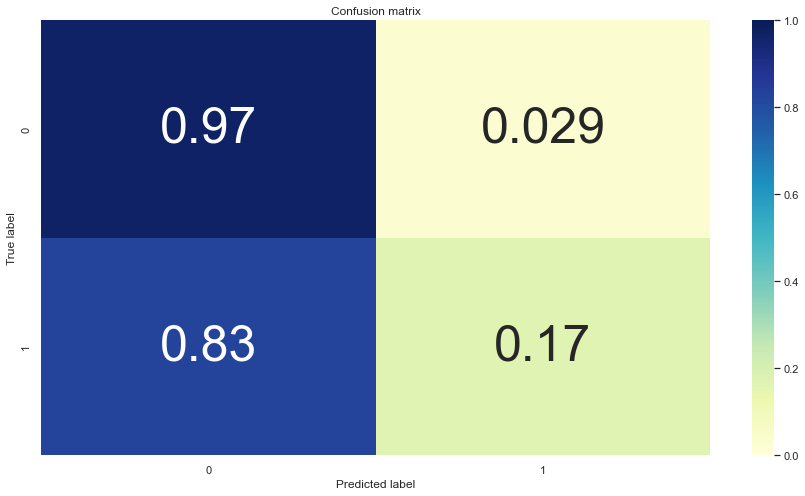

In [215]:
# Visualizing cm (confusion matrix) for train_data.

cm = confusion_matrix(y_train, y_pred)
cm_percent = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_percent, classes = logistic_reg.classes_, title='Confusion matrix')

#### a-2: Visualizing cm (confusion matrix) for test_data.

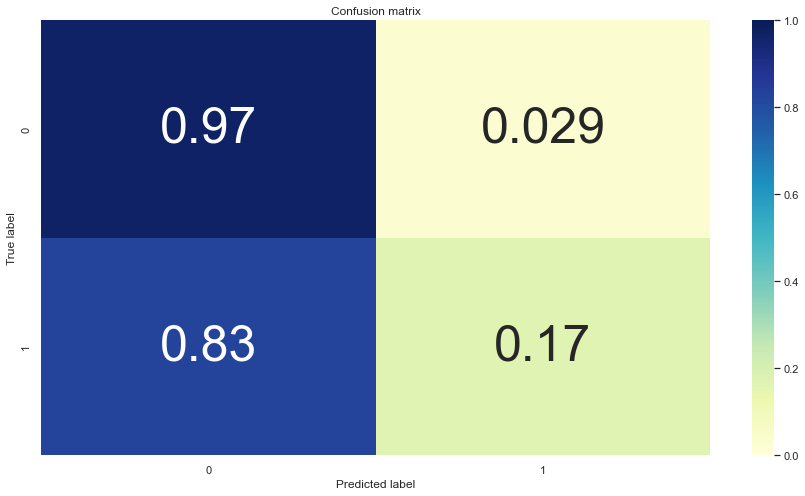

In [213]:

cm1 = confusion_matrix(y_test, y_pred1)
cm_percent1 = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_percent, classes = logistic_reg.classes_, title='Confusion matrix')

#### b. Confusion matrix for train_data (cm).

In [216]:
cm

array([[426297,  12524],
       [ 92469,  19088]], dtype=int64)

#### From this confusion matrix, we can calculate the accuracy, sensitivity, specificity, precision, and F1 score.

#### b-1: Overall accuraccy for train_data (acc_train_data):

In [231]:

acc_train_data =(426297+19088)/(426297+12524+92469+19088)
acc_train_data

0.809234744121313

#### There is another method to get the overall accuracy.

In [221]:
accuracy_score(y_train, y_pred)

0.809234744121313

#### b-2: Senstivity for train_data (sen_train_data):

In [225]:
sen_train_data = 19088/cm.sum(axis=1)[1]
sen_train_data

0.17110535421354106

#### b-3: Specificity for train_data (spe_train_data):

In [226]:
spe_train_data= 426297/cm.sum(axis=1)[0]
spe_train_data

0.9714598891119613

#### b-4: Precision for train_data (pre_train_data):

In [228]:
pre_train_data = 19088/cm.sum(axis=1)[1]
pre_train_data

0.17110535421354106

#### b-5: F1 score for train_data (f1_train_data):

In [232]:
f1_train_data = 2*19088/(2*19088+12524+92469)
f1_train_data

0.2666499032611808

In [233]:
# Classification Report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89    438821
           1       0.60      0.17      0.27    111557

    accuracy                           0.81    550378
   macro avg       0.71      0.57      0.58    550378
weighted avg       0.78      0.81      0.76    550378



#### c. Confusion matrix for test_data (cm1)

In [230]:
cm1

array([[106511,   3113],
       [ 23297,   4674]], dtype=int64)

#### c-1: Overall accuracy for test_data(acc_test_data):

In [236]:
acc_test_data = (106511+4674)/(106511+3113+23297+4674)
acc_test_data

0.8080598858970166

#### There is another method to get the overall accuracy.

In [237]:
accuracy_score(y_test, y_pred1)

0.8080598858970166

#### c-2: Sensitivity for test_data(sen_test_data)

In [238]:
sen_test_data = 4674/cm1.sum(axis=1)[1]
sen_test_data

0.16710164098530622

#### c-3: Specificity for test_data (spe_test_data)

In [239]:
spe_test_data = 106511/cm1.sum(axis=1)[0]
spe_test_data

0.9716029336641612

#### c-4: Precision for test_data(pre_test_data)

In [241]:
pre_test_data = 4674/cm1.sum(axis=1)[1]
pre_test_data

0.16710164098530622

#### c-5: F1 score for test_data(f1_test_data)

In [242]:
f1_test_data = 2*4674/(2*4674+3113+23297)
f1_test_data

0.2614240170031881

In [246]:
# Classification Report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89    109624
           1       0.60      0.17      0.26     27971

    accuracy                           0.81    137595
   macro avg       0.71      0.57      0.58    137595
weighted avg       0.78      0.81      0.76    137595



## 6. Summary

#### a. From the caculations and classification reports for both train_data and test_data, the relative data can match almost perfect.

#### b. Regarding the accuracy(80.8%), the model works very well.

#### c. The sensitivity of this model is around 17%, but the specificity is only 97%. It means that this model could predict the loan would NOT be approved defaultly very accurate, but the predicted results for those loans which were approved defaultly are very poor.

#### d. The precision states the same situation as the sensitivity.

#### e. The F1 score combines precision and sensitivity into a single measurement. Based on the classification reports, F1 scores shows that the model works very well on predict the loans which will NOT be approved defaultly.

In [124]:
np.geomspace(1e-5, 1e5, num=20)

array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])

In [125]:
# Creating a range for C values
np.geomspace(1e-5, 1e5, num=20)


array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])

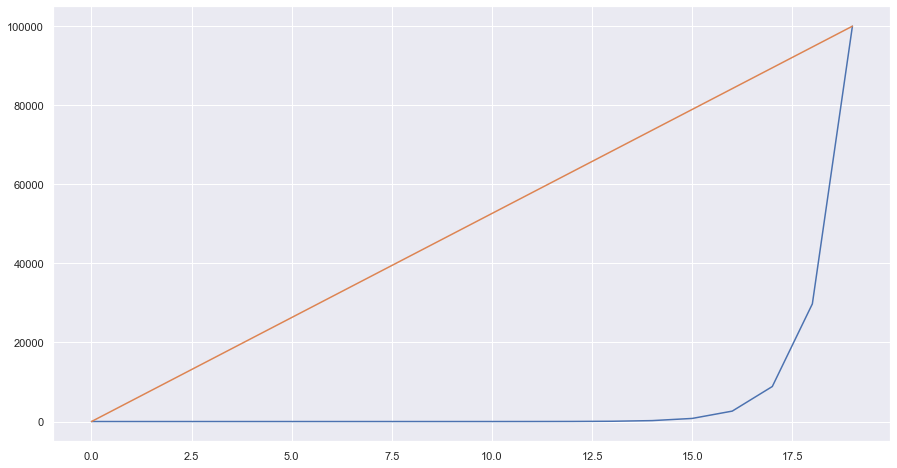

In [126]:
# ploting it
plt.plot(np.geomspace(1e-5, 1e5, num=20)) #  uniformly distributed in log space
plt.plot(np.linspace(1e-5, 1e5, num=20)) # uniformly distributed in linear space, instead of log space
# plt.plot(np.logspace(np.log10(1e-5) , np.log10(1e5) , num=20)) # same as geomspace

In [127]:
# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")

The CA of C parameter 1e-05 is 0.7967149969112249:
The Logg Loss of C parameter 1e-05 is 0.4903831646925658:

The CA of C parameter 3.359818286283781e-05 is 0.7967149969112249:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.4743797802457754:

The CA of C parameter 0.00011288378916846884 is 0.7967149969112249:
The Logg Loss of C parameter 0.00011288378916846884 is 0.4560799087969306:

The CA of C parameter 0.000379269019073225 is 0.7992950325229842:
The Logg Loss of C parameter 0.000379269019073225 is 0.44274346786244356:

The CA of C parameter 0.0012742749857031334 is 0.8063665104109887:
The Logg Loss of C parameter 0.0012742749857031334 is 0.4358358523511289:

The CA of C parameter 0.004281332398719391 is 0.8078491224245067:
The Logg Loss of C parameter 0.004281332398719391 is 0.431956907484964:



C:\Users\barry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 0.01438449888287663 is 0.8081180275446056:
The Logg Loss of C parameter 0.01438449888287663 is 0.42974429362476213:



C:\Users\barry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 0.04832930238571752 is 0.8081907046040917:
The Logg Loss of C parameter 0.04832930238571752 is 0.42886723581870795:



C:\Users\barry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 0.1623776739188721 is 0.8079872088375304:
The Logg Loss of C parameter 0.1623776739188721 is 0.42858301316157316:



C:\Users\barry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 0.5455594781168515 is 0.8078636578364039:
The Logg Loss of C parameter 0.5455594781168515 is 0.4284739729147124:



C:\Users\barry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 1.8329807108324339 is 0.8081252952505542:
The Logg Loss of C parameter 1.8329807108324339 is 0.4284448262807316:



C:\Users\barry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 6.1584821106602545 is 0.807805516188815:
The Logg Loss of C parameter 6.1584821106602545 is 0.4284545322003991:



C:\Users\barry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 20.6913808111479 is 0.8078418547185581:
The Logg Loss of C parameter 20.6913808111479 is 0.4284696872996689:



C:\Users\barry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 69.51927961775606 is 0.807805516188815:
The Logg Loss of C parameter 69.51927961775606 is 0.428471072809861:



C:\Users\barry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 233.57214690901213 is 0.8077037683055344:
The Logg Loss of C parameter 233.57214690901213 is 0.42846909003825384:



C:\Users\barry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 784.7599703514607 is 0.8078781932483011:
The Logg Loss of C parameter 784.7599703514607 is 0.4284613038997409:



C:\Users\barry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 2636.6508987303555 is 0.8080090119553763:
The Logg Loss of C parameter 2636.6508987303555 is 0.4284528673181338:



C:\Users\barry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 8858.667904100832 is 0.8079508703077873:
The Logg Loss of C parameter 8858.667904100832 is 0.4284520104692663:



C:\Users\barry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 29763.51441631313 is 0.8076746974817399:
The Logg Loss of C parameter 29763.51441631313 is 0.4284674157608159:

The CA of C parameter 100000.0 is 0.8076746974817399:
The Logg Loss of C parameter 100000.0 is 0.42846755277806753:



C:\Users\barry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# putting the outcomes in a Table

# reshaping
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)

In [ ]:
# zip
outcomes = zip(C_List, CA2, Logarithmic_Loss2)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'CA2','Logarithmic_Loss2'])

In [ ]:
df_outcomes

In [ ]:
# Training a Dummy Classifier

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
score = dummy_clf.score(X_test, y_test)

pred_proba_t = dummy_clf.predict_proba(X_test)
log_loss2 = log_loss(y_test, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)

In [ ]:
# Final Model 

log_reg3 = LogisticRegression(random_state=10, solver = 'lbfgs', C=784.759970)
log_reg3.fit(X_train, y_train)
score = log_reg3.score(X_valid, y_valid)

pred_proba_t = log_reg3.predict_proba(X_valid)
log_loss2 = log_loss(y_valid, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)